# Regression Tutorial



## Import packages

Import packages to make most of the third-party functions work.


In [77]:
import numpy as np
import csv
import matplotlib.pyplot as plt

## Read data from .csv

The simple way to read data from our .csv file.


In [78]:
price_list = list()

# read s&p500 data
with open('S&P500.csv','r') as f:
    for row in csv.reader(f,delimiter=','):
            price_list.append(row[4])

  ## Save as numpy array
  
  It's such a better data type to store data.

In [79]:
data = np.array(price_list[1:],dtype=np.float32)
data

array([1426.19, 1462.42, 1459.37, ..., 2639.4 , 2666.94, 2669.91],
      dtype=float32)

## Supposed to  them split into two parts as training data and testing data

We predict next price by the current price.

In [80]:
split_rate = 0.2 # HOW TO DIVIDE TRAINING DATA AND TESTING DATA

# original data combine with bias,
# just like y = Ax + b
data = data.reshape(-1,1)
data = np.concatenate((data, np.ones(len(data)).reshape(-1,1)), axis=1)

# training data
train_X = data[:-round(len(data)*split_rate)-1]
train_y = data[1:-round(len(data)*split_rate),0]

# testing data
test_X = data[-round(len(data)*split_rate)-1:-1]
test_y = data[-round(len(data)*split_rate):, 0]

## Least Square Equation

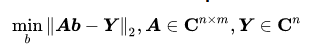

Particular solutions for the A of the generalized inverse matrix and Y the product, which is also two -norm minimum solution, which solution plus Laid general solution A of null space .


In [81]:
def least_square_equation(X, y):
    # write down the answer of Least square equation !
    # (X.T*X)^-1*X.T*y
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

The general regression model with 'n' observations and 'k' explanators, the first of which is a constant unit vector whose coefficient is the regression intercept, is
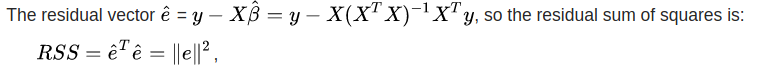

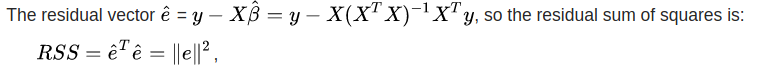

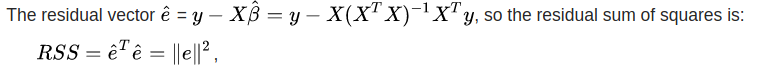

from wiki https://en.wikipedia.org/wiki/Residual_sum_of_squares

In [82]:
def sum_of_square_error(fx, y):
    E = y - fx
    # write down the answer of Sum square error !
    # E.T*E
    return np.dot(E.T,E)

## Linear regression method

the entry of LR.

In [83]:
def linear_regression(X, y):
    W = least_square_equation(X, y)
    return W # the weight A ([weight]*[x] = [y])

In [93]:
weight = linear_regression(train_X,train_y) # get weight
pred_y = np.sum(weight*test_X, axis=1) # weight * X
SSE = sum_of_square_error(pred_y, test_y) # get current error

In [95]:
SSE # sum_of_square_error

106684.77350140673

## Visualization


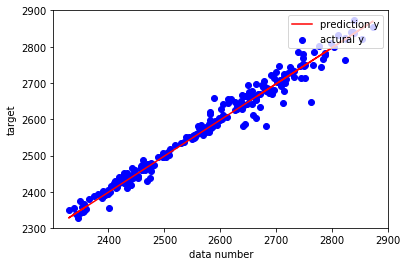

In [91]:
plt.scatter(test_X[:,0] ,test_y,  label='actural y',c='b')
plt.plot(test_X[:,0] ,pred_y,  label='prediction y',c='r')
plt.legend(loc='upper right')
plt.ylabel('target')
plt.xlabel('data number')
plt.show()